# Face-Recognition Analysis

## Import necessary libraries

This libraries are imported to visualize data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Read csv

In this file is stored all the pairs HOG features-label for each class for Face-Recognition extracted from the main dataset.

In [2]:
recognition = pd.read_csv('recognition.csv')

## Check out .info() and .head()

In order to analyze the feature size extracted from HOG.

In [3]:
recognition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 5941 entries, 0 to 5940
dtypes: float64(5940), int64(1)
memory usage: 226.6 MB


In [4]:
recognition.head()

,0,1,2,3,4,5,6,7,8,9,...,5931,5932,5933,5934,5935,5936,5937,5938,5939,5940
0,0.198046,0.230344,0.000000,0.0,0.031943,0.0,0.0,0.0,0.0,0.300264,...,0.0,0.000000,0.091388,0.000000,0.059474,0.0,0.000000,0.066494,0.000000,0
1,0.118230,0.214569,0.000000,0.0,0.024891,0.0,0.0,0.0,0.0,0.367136,...,0.0,0.038483,0.000000,0.073522,0.060235,0.0,0.000000,0.000000,0.000000,0
2,0.082046,0.000000,0.073955,0.0,0.030767,0.0,0.0,0.0,0.0,0.348695,...,0.0,0.000000,0.220453,0.136205,0.044520,0.0,0.000000,0.000000,0.000000,0
3,0.171889,0.000000,0.352686,0.0,0.292211,0.0,0.0,0.0,0.0,0.275022,...,0.0,0.000000,0.000000,0.000000,0.018883,0.0,0.080115,0.064805,0.000000,0
4,0.287758,0.430451,0.000000,0.0,0.255785,0.0,0.0,0.0,0.0,0.191839,...,0.0,0.000000,0.000000,0.000000,0.022898,0.0,0.000000,0.000000,0.173252,0


## Rename the last column with 'Target Class' tag
This column contains the label for each class

In [5]:
recognition.columns = [*recognition.columns[:-1], 'Target Class']

In [6]:
recognition

,0,1,2,3,4,5,6,7,8,9,...,5931,5932,5933,5934,5935,5936,5937,5938,5939,Target Class
0,0.198046,0.230344,0.000000,0.0,0.031943,0.0,0.0,0.0,0.0,0.300264,...,0.0,0.000000,0.091388,0.000000,0.059474,0.0,0.000000,0.066494,0.000000,0
1,0.118230,0.214569,0.000000,0.0,0.024891,0.0,0.0,0.0,0.0,0.367136,...,0.0,0.038483,0.000000,0.073522,0.060235,0.0,0.000000,0.000000,0.000000,0
2,0.082046,0.000000,0.073955,0.0,0.030767,0.0,0.0,0.0,0.0,0.348695,...,0.0,0.000000,0.220453,0.136205,0.044520,0.0,0.000000,0.000000,0.000000,0
3,0.171889,0.000000,0.352686,0.0,0.292211,0.0,0.0,0.0,0.0,0.275022,...,0.0,0.000000,0.000000,0.000000,0.018883,0.0,0.080115,0.064805,0.000000,0
4,0.287758,0.430451,0.000000,0.0,0.255785,0.0,0.0,0.0,0.0,0.191839,...,0.0,0.000000,0.000000,0.000000,0.022898,0.0,0.000000,0.000000,0.173252,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.527076,0.000000,0.000000,0.0,0.003263,0.0,0.0,0.0,0.0,0.459052,...,0.0,0.000000,0.000000,0.000000,0.019899,0.0,0.000000,0.000000,0.418726,9
4996,0.486434,0.000000,0.000000,0.0,0.022391,0.0,0.0,0.0,0.0,0.516188,...,0.0,0.000000,0.000000,0.000000,0.053880,0.0,0.000000,0.000000,0.473701,9
4997,0.681737,0.000000,0.000000,0.0,0.034823,0.0,0.0,0.0,0.0,0.177984,...,0.0,0.000000,0.000000,0.000000,0.093822,0.0,0.000000,0.000000,0.588921,9
4998,0.525413,0.000000,0.000000,0.0,0.003201,0.0,0.0,0.0,0.0,0.476297,...,0.0,0.000000,0.000000,0.000000,0.035919,0.0,0.000000,0.129507,0.155014,9


In [7]:
recognition['Target Class'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

## Standardize Data using StandarScaler

In order to get a more consistent classification, it's highly recommended to standardize data.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
scaler.fit(recognition.drop('Target Class', axis=1))

StandardScaler()

In [10]:
scaled_data = scaler.transform(recognition.drop('Target Class',axis=1))

In [11]:
pd.DataFrame(scaled_data,columns=recognition.columns[:-1])

,0,1,2,3,4,5,6,7,8,9,...,5930,5931,5932,5933,5934,5935,5936,5937,5938,5939
0,-1.030861,1.670668,-0.207238,-0.114813,-0.558022,-0.052961,-0.050694,-0.091699,-0.355369,-0.581955,...,-0.451750,-0.575402,-0.354753,1.004828,-0.351040,-0.575324,-0.28748,-0.344119,0.596000,-0.575492
1,-1.371266,1.528972,-0.207238,-0.114813,-0.634160,-0.052961,-0.050694,-0.091699,-0.355369,-0.259884,...,-0.451750,-0.575402,0.167268,-0.341376,0.602720,-0.569466,-0.28748,-0.344119,-0.440352,-0.575492
2,-1.525588,-0.398307,0.982900,-0.114813,-0.570715,-0.052961,-0.050694,-0.091699,-0.355369,-0.348699,...,-0.451750,-0.575402,-0.354753,2.906054,1.415885,-0.690414,-0.28748,-0.344119,-0.440352,-0.575492
3,-1.142420,-0.398307,5.468425,-0.114813,2.251872,-0.052961,-0.050694,-0.091699,-0.355369,-0.703526,...,-0.451750,-0.575402,-0.354753,-0.341376,-0.351040,-0.887718,-0.28748,1.564069,0.569678,-0.575492
4,-0.648252,3.468056,-0.207238,-0.114813,1.858614,-0.052961,-0.050694,-0.091699,-0.355369,-1.104152,...,-0.451750,-0.575402,-0.354753,-0.341376,-0.351040,-0.856823,-0.28748,-0.344119,-0.440352,0.768411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.372408,-0.398307,-0.207238,-0.114813,-0.867651,-0.052961,-0.050694,-0.091699,-0.355369,0.182800,...,-0.451750,-0.575402,-0.354753,-0.341376,-0.351040,-0.879901,-0.28748,-0.344119,-0.440352,2.672533
4996,0.199074,-0.398307,-0.207238,-0.114813,-0.661150,-0.052961,-0.050694,-0.091699,-0.355369,0.457979,...,-0.451750,-0.575402,-0.354753,-0.341376,-0.351040,-0.618374,-0.28748,-0.344119,-0.440352,3.098976
4997,1.032018,-0.398307,-0.207238,-0.114813,-0.526929,-0.052961,-0.050694,-0.091699,-0.355369,-1.170881,...,0.876375,-0.575402,-0.354753,-0.341376,-0.351040,-0.310980,-0.28748,-0.344119,-0.440352,3.992727
4998,0.365316,-0.398307,-0.207238,-0.114813,-0.868323,-0.052961,-0.050694,-0.091699,-0.355369,0.265855,...,-0.451750,-0.575402,-0.354753,-0.341376,-0.351040,-0.756610,-0.28748,-0.344119,1.578097,0.626941


## PCA Decomposition
PCA is used to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [13]:
pca.fit(scaled_data)

PCA(n_components=2)

In [14]:
x_pca = pca.transform(scaled_data)

In [15]:
scaled_data.shape

(5000, 5940)

In [16]:
x_pca.shape

(5000, 2)

## Scatter Plot 2-D
In this scatter plot all the classes are compared between each other

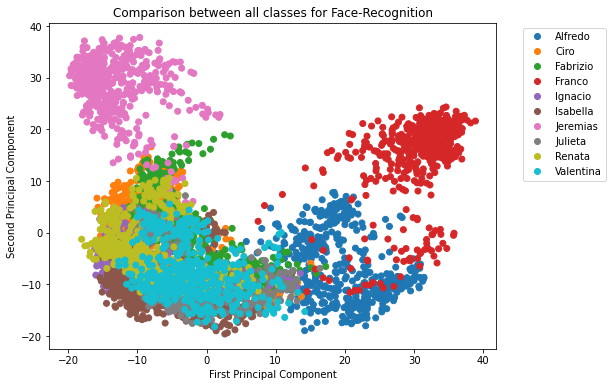

In [17]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(x_pca[:,0],x_pca[:,1],c=recognition['Target Class'], cmap='tab10')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Comparison between all classes for Face-Recognition')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Alfredo',
                   'Ciro',
                   'Fabrizio',
                   'Franco',
                   'Ignacio',
                   'Isabella',
                   'Jeremias',
                   'Julieta',
                   'Renata',
                   'Valentina'],
           bbox_to_anchor=(1.05, 1),
           loc=2)

From the figure below, we concluded that using PCA decomposition in 2-D space is not enough for using SVM as a classificator, so we try to use in a high order space. 

## PCA Decomposition in more components


PCA now is used to find the 66 principal components, it represents a 1% from the originals features that are 5940 components.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
pca = PCA(n_components=66)

In [13]:
pca.fit(scaled_data)

PCA(n_components=66)

In [14]:
x_pca = pca.transform(scaled_data)

## Train Test Split

Separate the dataset in two parts, 70% for training and 30% for testing.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=x_pca
y=recognition['Target Class'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Try using KNeighborsClassifier

In this section, we explore another alternative for supervised learning, and it is KNeighbors. Here, we check how increase the error rate as far as we increased the main parameter for the classifier.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    knn_error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'KNN Error Rate')

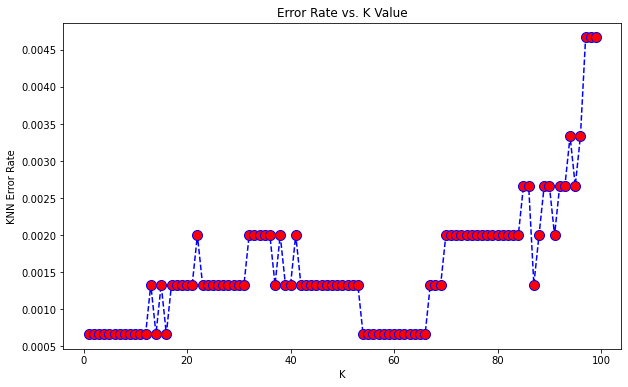

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),knn_error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('KNN Error Rate')

## Try using SVM with Linear Kernel

In this section, we use GridSearchCV to get the best parameter for Support Vector Machine using a Linear kernel, to compare the score with the other one got from KNeighbors.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC,LinearSVC

In [26]:
param_grid = {'estimator__C':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,100000,1e6,1e7,1e8,1e9]}

In [27]:
grid = GridSearchCV(OneVsRestClassifier(LinearSVC(max_iter=10000000)),param_grid,verbose=3)

In [28]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 1/5] END ................estimator__C=1e-09;, score=0.990 total time=   0.0s
[CV 2/5] END ................estimator__C=1e-09;, score=0.989 total time=   0.0s
[CV 3/5] END ................estimator__C=1e-09;, score=0.996 total time=   0.0s
[CV 4/5] END ................estimator__C=1e-09;, score=0.997 total time=   0.0s
[CV 5/5] END ................estimator__C=1e-09;, score=0.989 total time=   0.0s
[CV 1/5] END ................estimator__C=1e-08;, score=0.991 total time=   0.0s
[CV 2/5] END ................estimator__C=1e-08;, score=0.989 total time=   0.0s
[CV 3/5] END ................estimator__C=1e-08;, score=0.997 total time=   0.0s
[CV 4/5] END ................estimator__C=1e-08;, score=0.997 total time=   0.0s
[CV 5/5] END ................estimator__C=1e-08;, score=0.989 total time=   0.0s
[CV 1/5] END ................estimator__C=1e-07;, score=0.993 total time=   0.0s
[CV 2/5] END ................estimator__C=1e-07;

GridSearchCV(estimator=OneVsRestClassifier(estimator=LinearSVC(max_iter=10000000)),
             param_grid={'estimator__C': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                          0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                          1000, 10000, 100000, 1000000.0,
                                          10000000.0, 100000000.0,
                                          1000000000.0]},
             verbose=3)

In [29]:
grid.best_params_

{'estimator__C': 0.01}

In [119]:
grid.best_score_

1.0

In order to make sure that we are not choosing a too small parameter, we took C=0.1 as the best fit to our Machine Learning Model trained with Support Vector Machine.

## Try using SVM with RBF Kernel

In this section, we use GridSearchCV to get the best parameter for Support Vector Machine using a RBF kernel, to compare the score with the other one got from KNeighbors.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC,LinearSVC

In [32]:
param_grid_rbf = {'estimator__C':[1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000],
                  'estimator__gamma':[0.001,0.01,0.1,1,10,1],
                  'estimator__kernel':['rbf']
                 }

In [33]:
grid_rbf = GridSearchCV(OneVsRestClassifier(SVC(max_iter=100000)),param_grid_rbf,verbose=3)

In [35]:
grid_rbf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END estimator__C=0.0001, estimator__gamma=0.001, estimator__kernel=rbf;, score=1.000 total time=   0.8s
[CV 2/5] END estimator__C=0.0001, estimator__gamma=0.001, estimator__kernel=rbf;, score=0.999 total time=   0.9s
[CV 3/5] END estimator__C=0.0001, estimator__gamma=0.001, estimator__kernel=rbf;, score=1.000 total time=   0.8s
[CV 4/5] END estimator__C=0.0001, estimator__gamma=0.001, estimator__kernel=rbf;, score=1.000 total time=   0.8s
[CV 5/5] END estimator__C=0.0001, estimator__gamma=0.001, estimator__kernel=rbf;, score=1.000 total time=   0.9s
[CV 1/5] END estimator__C=0.0001, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.999 total time=   0.9s
[CV 2/5] END estimator__C=0.0001, estimator__gamma=0.01, estimator__kernel=rbf;, score=1.000 total time=   0.8s
[CV 3/5] END estimator__C=0.0001, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.996 total time=   0.8s
[CV 4/5] END estimator__C=0.0001, est

[CV 5/5] END estimator__C=0.01, estimator__gamma=0.1, estimator__kernel=rbf;, score=0.110 total time=   4.8s
[CV 1/5] END estimator__C=0.01, estimator__gamma=1, estimator__kernel=rbf;, score=0.106 total time=   7.3s
[CV 2/5] END estimator__C=0.01, estimator__gamma=1, estimator__kernel=rbf;, score=0.104 total time=   7.5s
[CV 3/5] END estimator__C=0.01, estimator__gamma=1, estimator__kernel=rbf;, score=0.104 total time=   7.3s
[CV 4/5] END estimator__C=0.01, estimator__gamma=1, estimator__kernel=rbf;, score=0.106 total time=   7.4s
[CV 5/5] END estimator__C=0.01, estimator__gamma=1, estimator__kernel=rbf;, score=0.106 total time=   7.3s
[CV 1/5] END estimator__C=0.01, estimator__gamma=10, estimator__kernel=rbf;, score=0.106 total time=   7.4s
[CV 2/5] END estimator__C=0.01, estimator__gamma=10, estimator__kernel=rbf;, score=0.104 total time=   7.6s
[CV 3/5] END estimator__C=0.01, estimator__gamma=10, estimator__kernel=rbf;, score=0.104 total time=   7.4s
[CV 4/5] END estimator__C=0.01, 

[CV 2/5] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=rbf;, score=1.000 total time=   0.9s
[CV 3/5] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=rbf;, score=1.000 total time=   0.9s
[CV 4/5] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=rbf;, score=1.000 total time=   1.0s
[CV 5/5] END estimator__C=10, estimator__gamma=0.001, estimator__kernel=rbf;, score=1.000 total time=   0.9s
[CV 1/5] END estimator__C=10, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.967 total time=   4.9s
[CV 2/5] END estimator__C=10, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.969 total time=   5.0s
[CV 3/5] END estimator__C=10, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.969 total time=   4.9s
[CV 4/5] END estimator__C=10, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.959 total time=   5.0s
[CV 5/5] END estimator__C=10, estimator__gamma=0.01, estimator__kernel=rbf;, score=0.967 total time=   4.9s
[CV 1/5] END estimator__

[CV 4/5] END estimator__C=1000, estimator__gamma=1, estimator__kernel=rbf;, score=0.106 total time=   8.2s
[CV 5/5] END estimator__C=1000, estimator__gamma=1, estimator__kernel=rbf;, score=0.106 total time=   8.2s
[CV 1/5] END estimator__C=1000, estimator__gamma=10, estimator__kernel=rbf;, score=0.106 total time=   8.3s
[CV 2/5] END estimator__C=1000, estimator__gamma=10, estimator__kernel=rbf;, score=0.104 total time=   8.4s
[CV 3/5] END estimator__C=1000, estimator__gamma=10, estimator__kernel=rbf;, score=0.104 total time=   8.3s
[CV 4/5] END estimator__C=1000, estimator__gamma=10, estimator__kernel=rbf;, score=0.106 total time=   8.4s
[CV 5/5] END estimator__C=1000, estimator__gamma=10, estimator__kernel=rbf;, score=0.106 total time=   8.4s
[CV 1/5] END estimator__C=1000, estimator__gamma=1, estimator__kernel=rbf;, score=0.106 total time=   8.6s
[CV 2/5] END estimator__C=1000, estimator__gamma=1, estimator__kernel=rbf;, score=0.104 total time=   8.3s
[CV 3/5] END estimator__C=1000, 

GridSearchCV(estimator=OneVsRestClassifier(estimator=SVC(max_iter=100000)),
             param_grid={'estimator__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                          1000, 10000],
                         'estimator__gamma': [0.001, 0.01, 0.1, 1, 10, 1],
                         'estimator__kernel': ['rbf']},
             verbose=3)

In [37]:
grid_rbf.best_params_

{'estimator__C': 0.1, 'estimator__gamma': 0.001, 'estimator__kernel': 'rbf'}

In [120]:
grid_rbf.best_score_

1.0

## Train the Support Vector Machine with Linear Kernel

In this section, we train a Machine Learning model using SVM as a classifier with the best parameter got from GridSearchCV

In [22]:
svm = OneVsRestClassifier(LinearSVC(C=0.1, random_state=42, max_iter=100000))

In [23]:
svm.fit(X_train,y_train)

OneVsRestClassifier(estimator=LinearSVC(C=0.1, max_iter=100000,
                                        random_state=42))

## Predictions and Evaluations

In this section, we analyze some metrics for SVM with Linear kernel.

In [24]:
predictions = svm.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [26]:
print(classification_report(y_test,
                            predictions,
                            target_names=[
                            'Alfredo',
                            'Ciro',
                            'Fabrizio',
                            'Franco',
                            'Ignacio',
                            'Isabella',
                            'Jeremias',
                            'Julieta',
                            'Renata',
                            'Valentina']))

              precision    recall  f1-score   support

     Alfredo       1.00      1.00      1.00       164
        Ciro       1.00      1.00      1.00       152
    Fabrizio       1.00      1.00      1.00       155
      Franco       1.00      1.00      1.00       154
     Ignacio       1.00      1.00      1.00       143
    Isabella       1.00      1.00      1.00       141
    Jeremias       1.00      1.00      1.00       143
     Julieta       1.00      1.00      1.00       158
      Renata       1.00      1.00      1.00       132
   Valentina       1.00      1.00      1.00       158

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



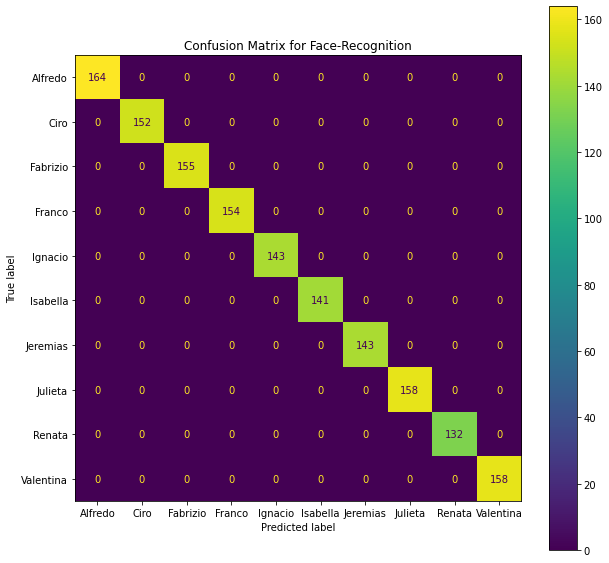

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(svm,
                                      X_test,
                                      y_test,
                                      display_labels=[
                                          'Alfredo',
                                          'Ciro',
                                          'Fabrizio',
                                          'Franco',
                                          'Ignacio',
                                          'Isabella',
                                          'Jeremias',
                                          'Julieta',
                                          'Renata',
                                          'Valentina'
                                      ],
                                      ax=ax)
plt.title('Confusion Matrix for Face-Recognition')
plt.show()

## Save Model

Save Machine Learning model in XML format

In [29]:
import joblib

In [30]:
joblib.dump(svm, 'face_recognition.xml')

['face_recognition.xml']